https://www.kaggle.com/c/porto-seguro-data-challenge

###### Acessar https://drive.google.com/drive/folders/1jFo7K5X749N8LzF-SuDBD-zB1YGXJqjs?usp=sharing

Clicar em "Adicionar Atalho ao Google Drive"

In [ ]:
path_notebook = '/content/drive/MyDrive/Desafio_Kaggle/'

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)
#drive.flush_and_unmount()

Mounted at /content/drive


In [ ]:
import os
import sys
sys.path.insert(0, os.path.dirname(path_notebook)) 

In [ ]:
import AleTransforms as trf
import AleDatasetAnalysis as dat
import AleMLAnalysis as aml
import AleExplainers as exp
import AleLearners as lrn

In [ ]:
import importlib
importlib.reload(trf)
importlib.reload(dat)
importlib.reload(aml)
importlib.reload(exp)
importlib.reload(lrn)

<module 'AleLearners' from '/content/drive/MyDrive/Desafio_Kaggle/AleLearners.py'>

# Acessando API do Kaggle, Download e Extração do Dataset

In [ ]:
#Instala a API
!pip install kaggle

In [ ]:
# Move minhas credenciais para a pasta em que a API foi instalada
!mkdir -p ~/.kaggle/ && cp -i /content/drive/MyDrive/Desafio_Kaggle/kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#Baixa dos dados do Projeto, descompacta e deleta arquivo zip
!kaggle competitions download -c porto-seguro-data-challenge

  0% 0.00/159k [00:00<?, ?B/s]
100% 159k/159k [00:00<00:00, 60.3MB/s]
  0% 0.00/1.65M [00:00<?, ?B/s]
100% 1.65M/1.65M [00:00<00:00, 112MB/s]
  0% 0.00/2.46M [00:00<?, ?B/s]
100% 2.46M/2.46M [00:00<00:00, 168MB/s]
  0% 0.00/1.85k [00:00<?, ?B/s]
100% 1.85k/1.85k [00:00<00:00, 1.70MB/s]


# Começa a fazer os Trem

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!ls

drive	      sample_data	     test.csv.zip
metadata.csv  submission_sample.csv  train.csv.zip


In [ ]:
pd.read_csv('metadata.csv')

Variavel cod          Variavel tipo
0            id    Qualitativo nominal
1          var1    Qualitativo nominal
2          var2    Qualitativo nominal
3          var3    Qualitativo nominal
4          var4    Qualitativo nominal
..          ...                    ...
65        var65  Quantitativo continua
66        var66  Quantitativo continua
67        var67  Quantitativo discreto
68        var68  Quantitativo discreto
69            y  Quantitativo discreto

[70 rows x 2 columns]

In [ ]:
df = pd.read_csv('train.csv.zip')

In [ ]:
df

id  var1  var2  var3  ...      var66     var67     var68  y
0          1    18    19  2853  ...    0.00603  0.132353  0.139706  1
1          8     4   110  1986  ... -999.00000  0.147059  0.106618  0
2         30     0    39  1019  ... -999.00000  0.382353  0.242647  0
3         43    20    39  1751  ...    0.00201  0.147059  0.132353  0
4         46     7    44  2262  ... -999.00000  0.455882  0.132353  1
...      ...   ...   ...   ...  ...        ...       ...       ... ..
14118  35295     4    39  2511  ... -999.00000  0.455882  0.147059  0
14119  35296    19   129  1114  ... -999.00000  0.147059  0.198529  0
14120  35301    27    44  1786  ... -999.00000  0.397059  0.158088  0
14121  35304     4    89   210  ... -999.00000  0.264706  0.128676  0
14122  35306    21    53   568  ... -999.00000  0.176471  0.128676  0

[14123 rows x 70 columns]

In [ ]:
df[df == -999] = np.nan

In [ ]:
analiseexp = dat.DistribuicoesDataset(df, num_div = 20, frac_cat = 0.05)

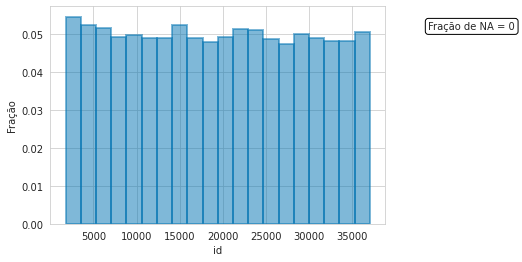

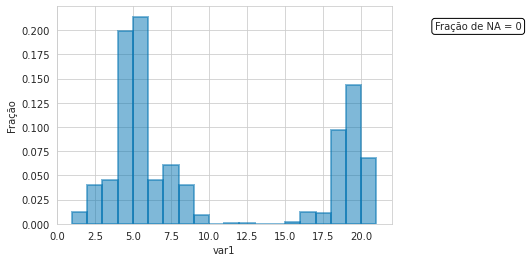

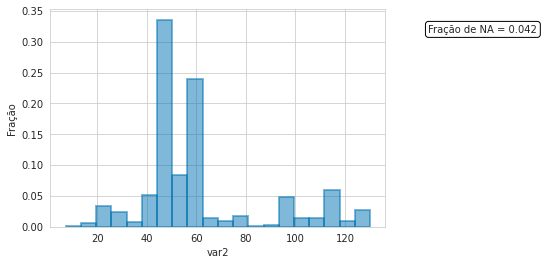

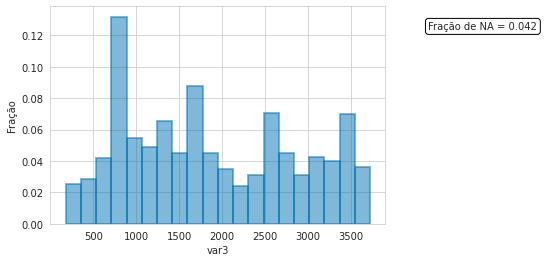

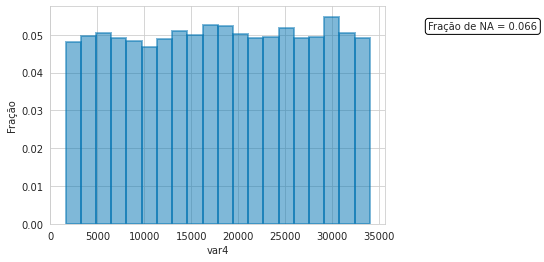

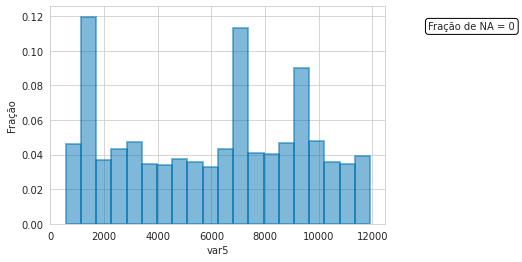

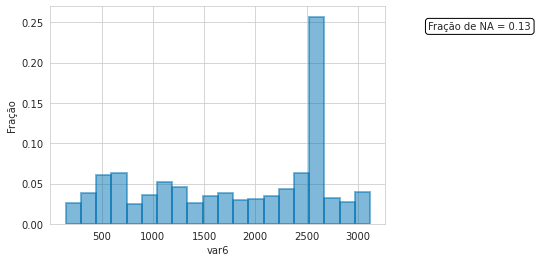

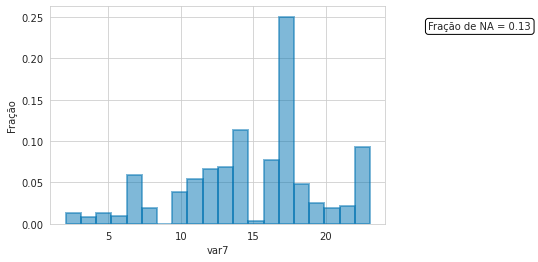

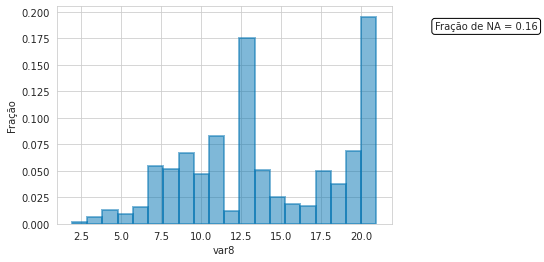

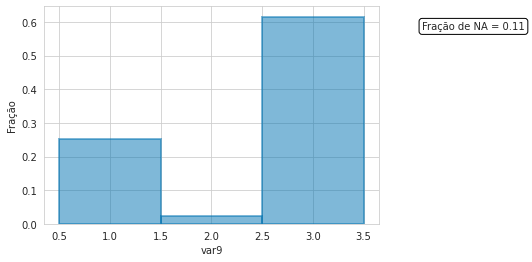

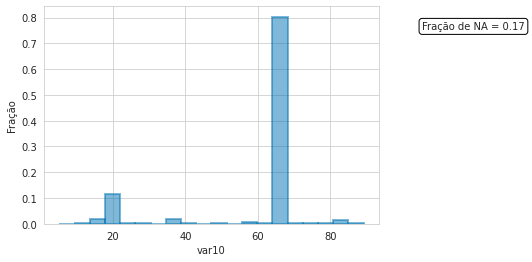

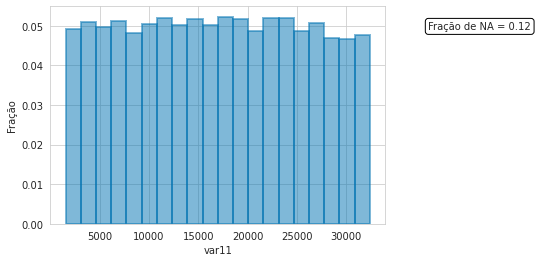

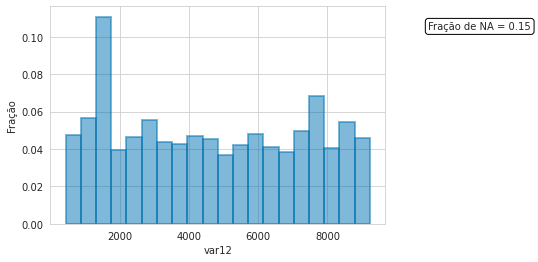

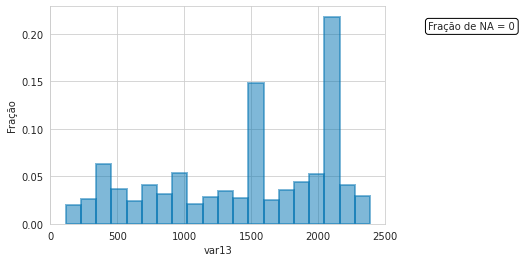

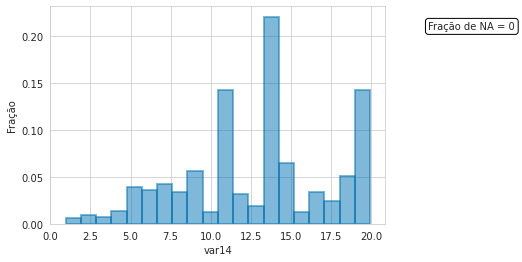

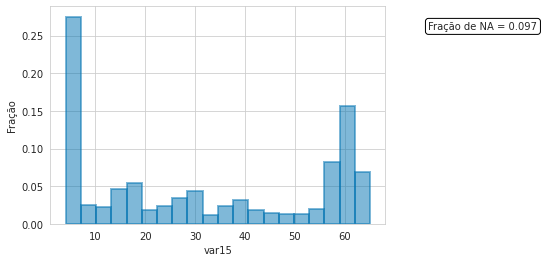

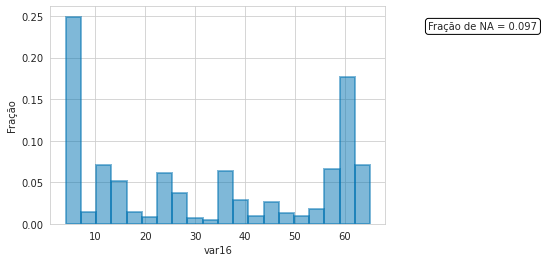

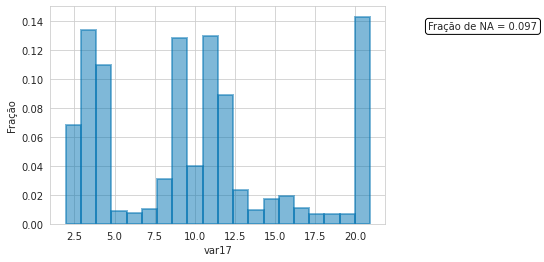

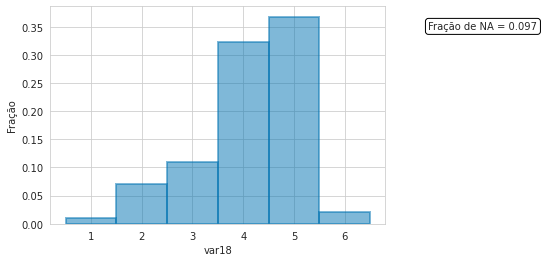

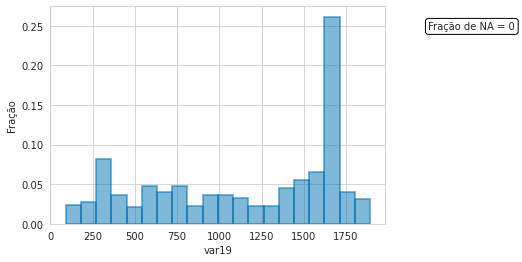

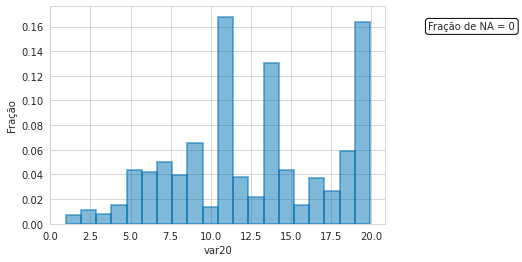

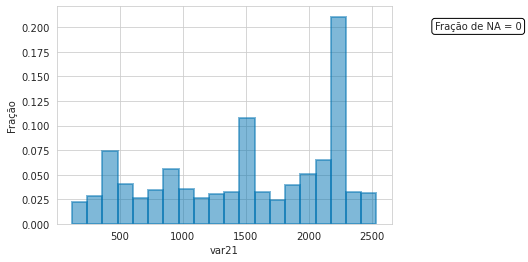

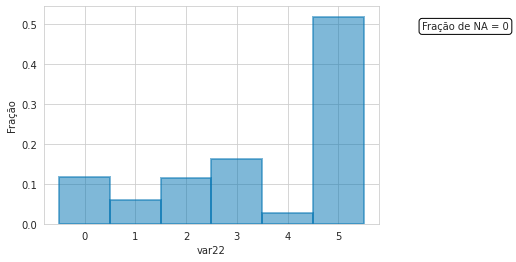

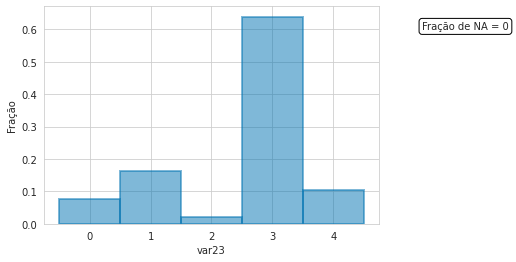

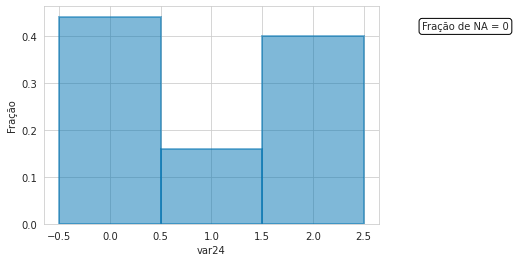

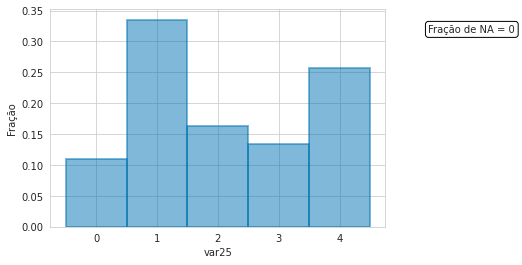

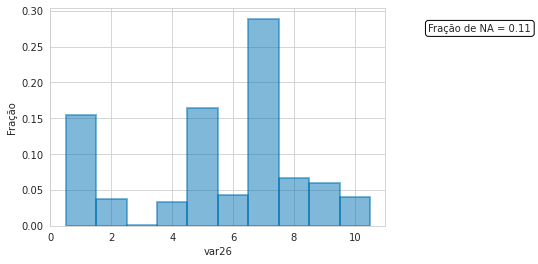

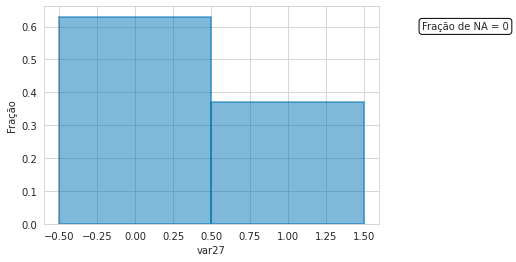

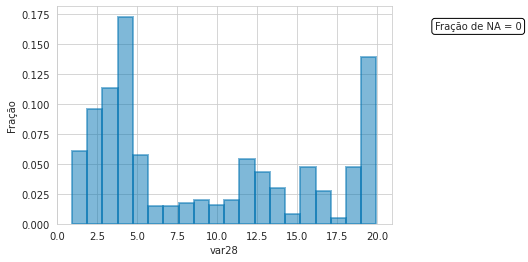

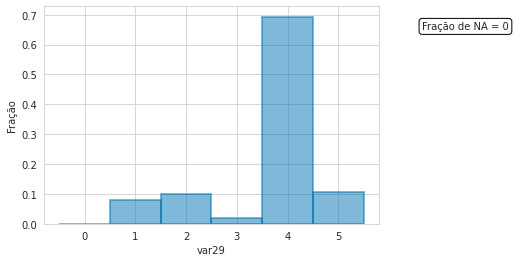

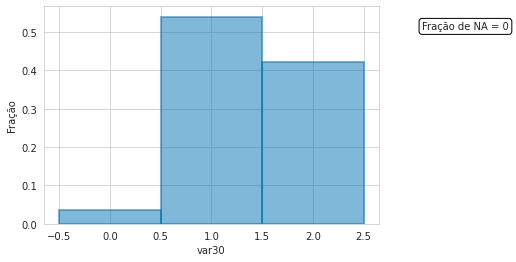

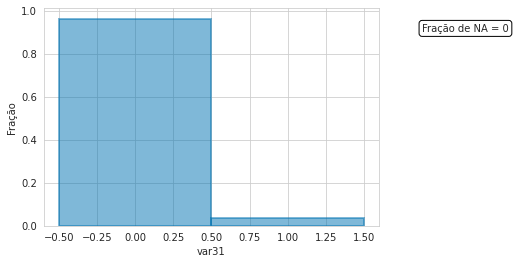

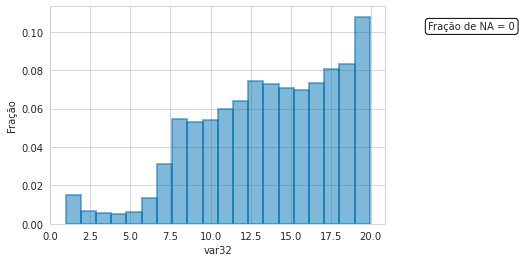

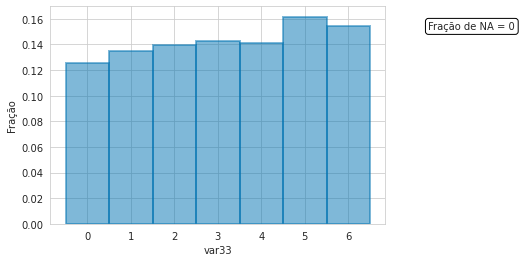

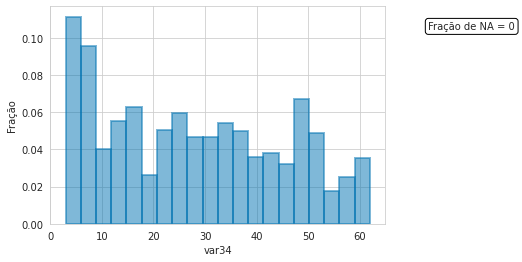

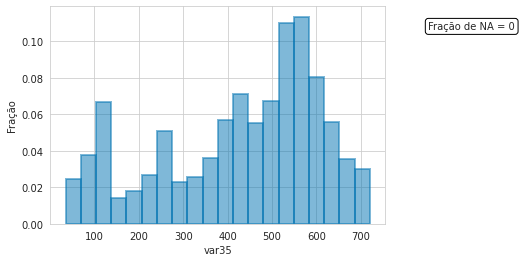

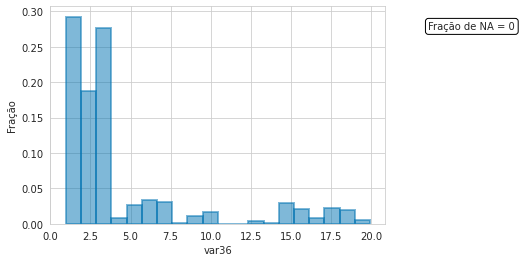

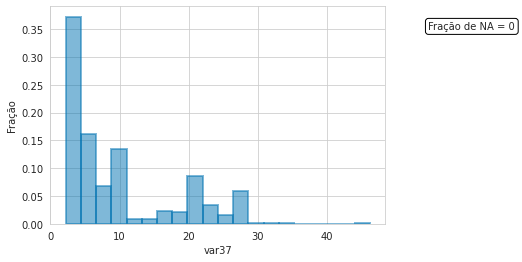

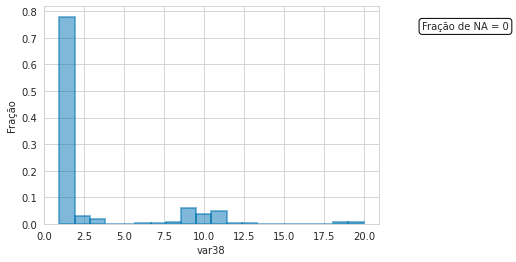

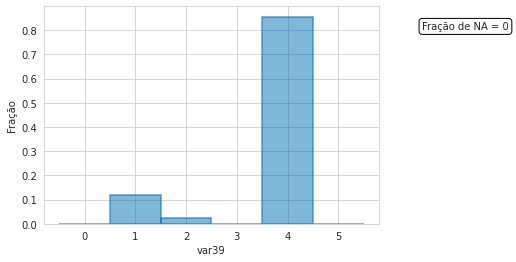

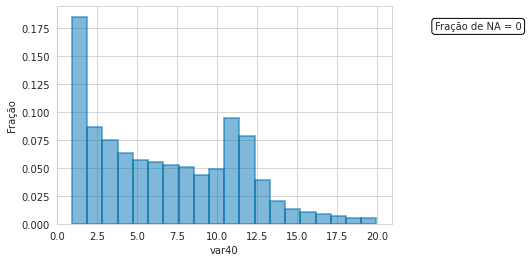

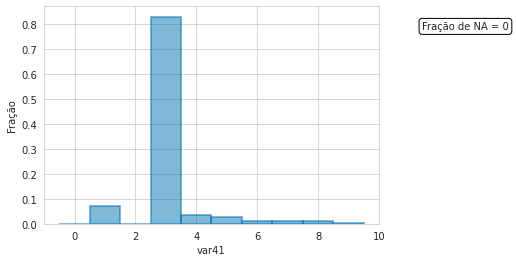

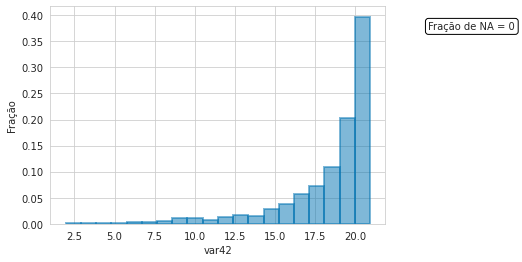

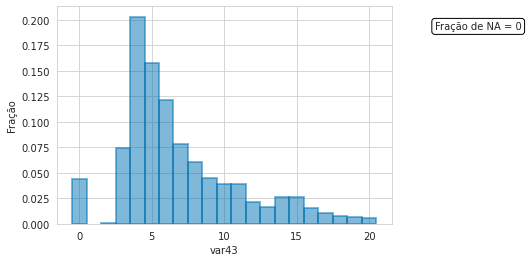

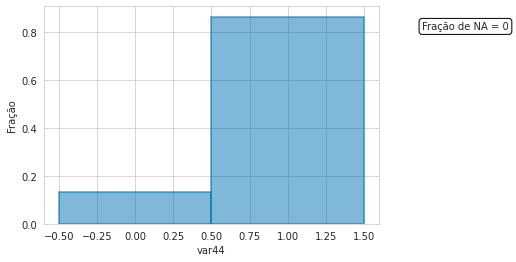

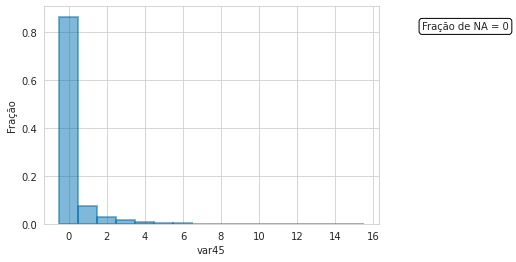

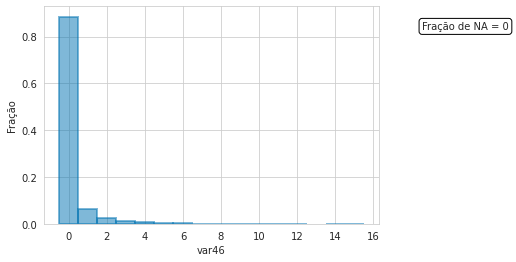

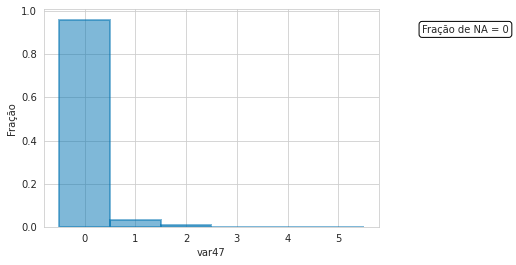

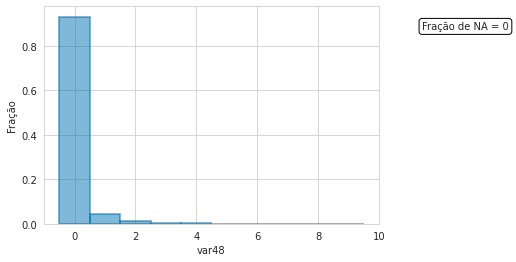

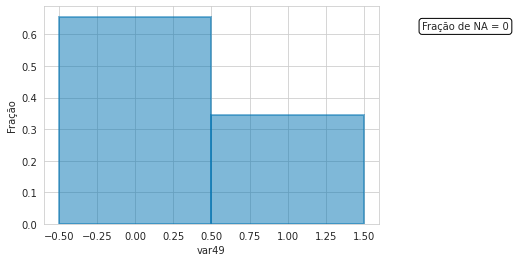

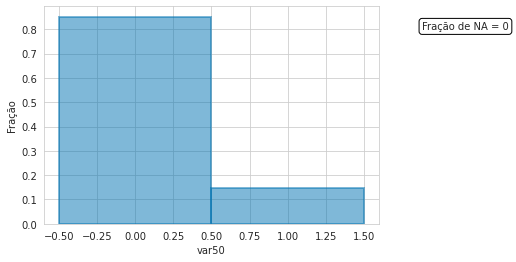

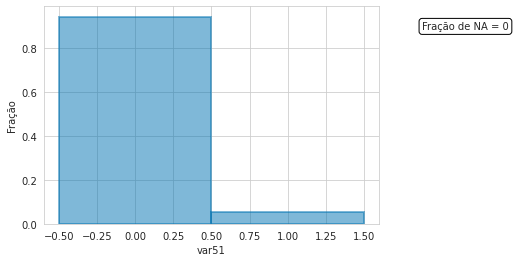

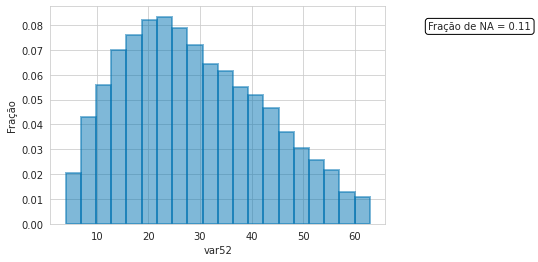

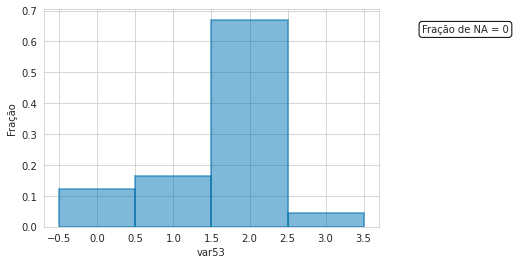

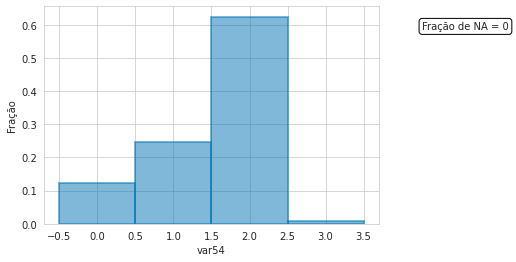

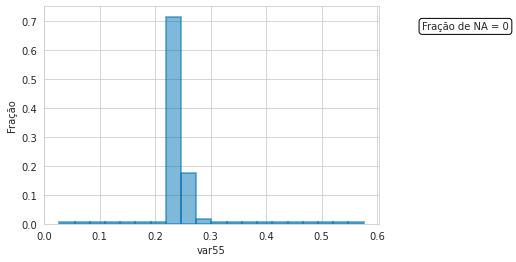

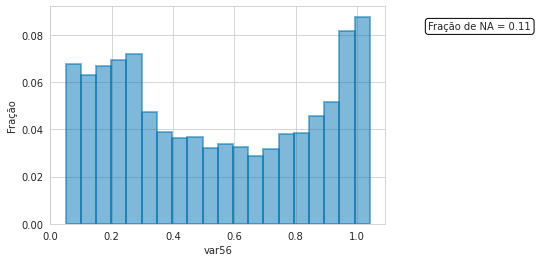

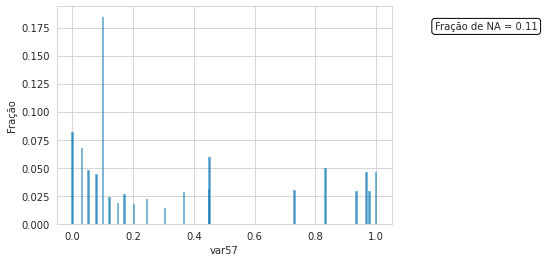

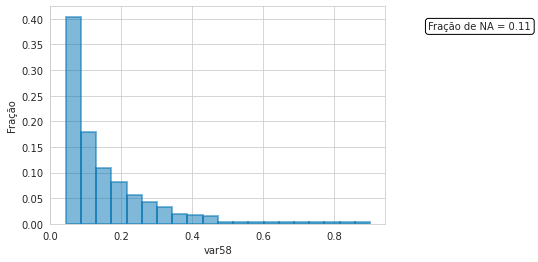

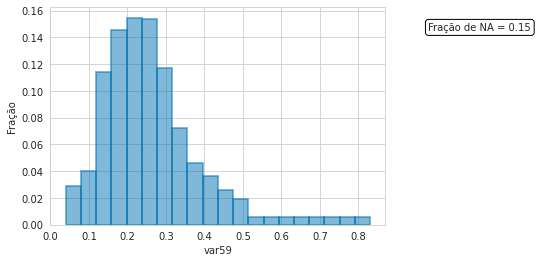

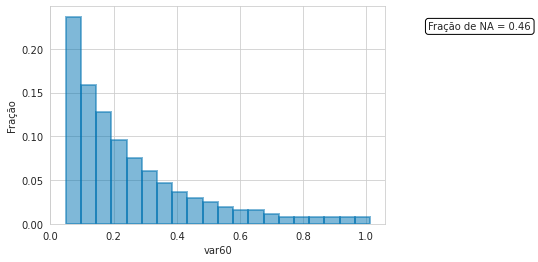

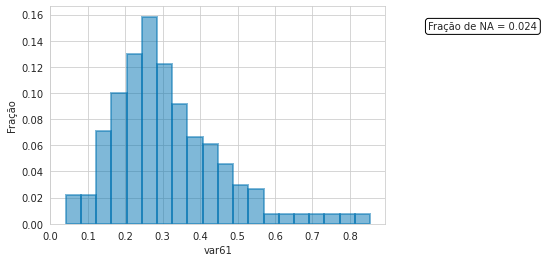

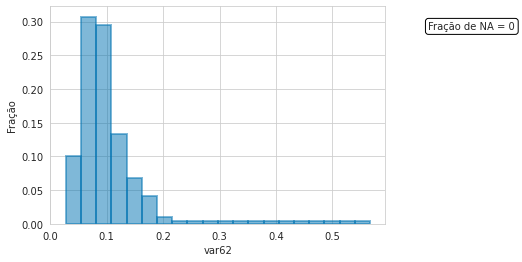

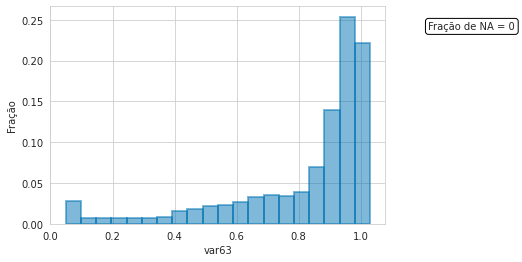

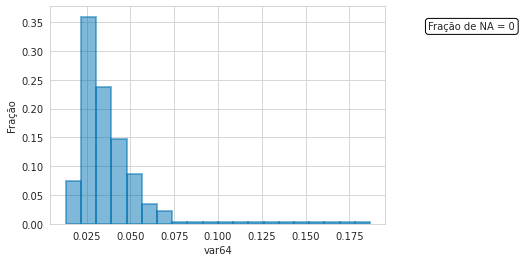

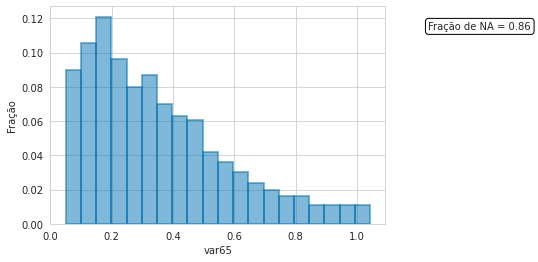

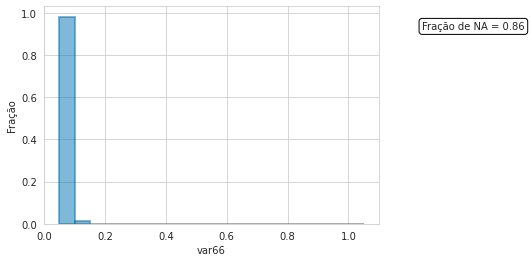

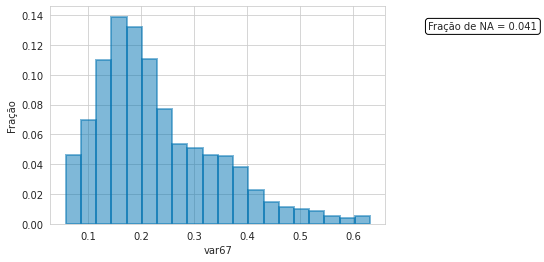

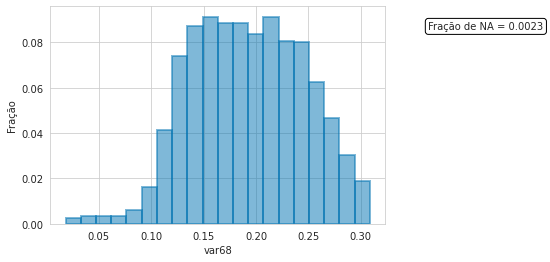

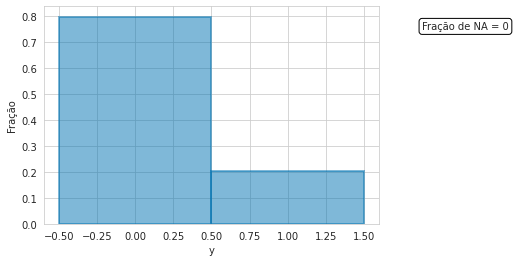

In [ ]:
analiseexp.grafico_distribuicao()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit, ShuffleSplit
from sklearn.model_selection import StratifiedKFold, KFold

In [ ]:
alvo = 'y'

In [ ]:
frac_teste = 0.1

ss_teste = StratifiedShuffleSplit(n_splits = 1, test_size = frac_teste, random_state = 42)
split_teste = list(ss_teste.split(df.values, df[alvo].values))[0] 

df_intermed = df.iloc[split_teste[0]]
df_teste = df.iloc[split_teste[1]]

In [ ]:
df_teste

id  var1   var2    var3  ...     var66     var67     var68  y
10410  21642    18   66.0  2801.0  ...       NaN  0.058824  0.132353  0
5128    1396     7   53.0   550.0  ...       NaN  0.205882  0.224265  0
2850   20637    18  129.0  3521.0  ...       NaN  0.279412  0.283088  0
4497   33543     4   44.0  2258.0  ...       NaN  0.485294  0.264706  0
4386   32083     4  126.0  2900.0  ...       NaN  0.308824  0.128676  0
...      ...   ...    ...     ...  ...       ...       ...       ... ..
8670   14009    18   53.0  3488.0  ...       NaN  0.058824  0.250000  0
12426  29803     4  121.0  1044.0  ...  0.003015  0.058824  0.257353  1
4358   31816     4   38.0  1204.0  ...  0.000000  0.191176  0.261029  1
12302  29252     4  126.0  1461.0  ...       NaN  0.235294  0.125000  1
4731     211     2   44.0   543.0  ...       NaN  0.235294  0.224265  0

[1413 rows x 70 columns]

In [ ]:
frac_val = 0.5
num_splits = 5

ss = StratifiedShuffleSplit(n_splits = num_splits, test_size = frac_val, random_state = 42)
#ss = StratifiedKFold(n_splits = num_splits, shuffle = True, random_state = 42)
lista_splits = list(ss.split(df_intermed.values, df_intermed[alvo].values))

In [ ]:
colunas_id = ['id']

In [ ]:
dict_Xy = {}

i = 0
for par in lista_splits:
    df_treino = df_intermed.iloc[par[0]]
    df_val = df_intermed.iloc[par[1]]
    
    dict_Xy.update({'Treino_' + str(2*i + 1): (df_treino.drop(colunas_id, axis = 1).drop(alvo, axis = 1), df_treino[alvo]),
               'Treino_' + str(2*i + 2): (df_val.drop(colunas_id, axis = 1).drop(alvo, axis = 1), df_val[alvo])})
    #dict_Xy.update({'Treino_' + str(i+1): (df_treino_t.drop(colunas_id, axis = 1).drop(nome_alvo, axis = 1), df_treino_t[nome_alvo])})
    #dict_Xy.update({'Treino_' + str(i+1): (df_val_t.drop(colunas_id, axis = 1).drop(nome_alvo, axis = 1), df_val_t[nome_alvo])})
    
    i = i + 1

In [ ]:
clf = lrn.SeriesMultiGradientClassifier()
clf.setup_datasets(dict_Xy, laurent = True, ordem = 3, apenas_interacoes = False)
clf.setup_optimizer(alpha = 0.01, epsilon = 0, early_stop = 10, filtro_atualizacao_thetas = True)
clf.fit(num_passos = 1000, verbose = 1, plot = False)

Checando Datasets
Filtrando Features sem Variância
Criando a Expansão em Série
Número de Parâmetros da Expansão: 374398
Calculando as Normalizações das Features
Número de Parâmetros: 373987
Criando o Baseline Constante
Inicializando os Parâmetros para Fitting
Número de Parâmetros sendo Atualizados: 373987 (0)
Número de Parâmetros sendo Atualizados: 203560 (1)
Número de Parâmetros sendo Atualizados: 195286 (2)
Número de Parâmetros sendo Atualizados: 186351 (3)
Número de Parâmetros sendo Atualizados: 177267 (4)
Número de Parâmetros sendo Atualizados: 167643 (5)
Número de Parâmetros sendo Atualizados: 157573 (6)
Número de Parâmetros sendo Atualizados: 147626 (7)
Número de Parâmetros sendo Atualizados: 137980 (8)
Número de Parâmetros sendo Atualizados: 128593 (9)
Número de Parâmetros sendo Atualizados: 119433 (10)
Número de Parâmetros sendo Atualizados: 110783 (11)
Número de Parâmetros sendo Atualizados: 102714 (12)
Número de Parâmetros sendo Atualizados: 95215 (13)
Número de Parâmetros se

In [ ]:
clf.grafico_vies_variancia()

In [ ]:
probs_intermed = clf.predict_proba(df_intermed.drop(colunas_id, axis = 1).drop(alvo, axis = 1))[:, 1]
probs_teste = clf.predict_proba(df_teste.drop(colunas_id, axis = 1).drop(alvo, axis = 1))[:, 1]

In [ ]:
df_intermed_aval = df_intermed.copy()
df_teste_aval = df_teste.copy()

df_intermed_aval['Prob'] = probs_intermed
df_teste_aval['Prob'] = probs_teste

In [ ]:
dict_dfs = {'Treino': df_intermed_aval,
            'Teste': df_teste_aval}
avaliacaoclf = aml.AvaliaDatasetsClassificacao(dict_dfs, 
                                               alvo, 
                                               'Prob', 
                                               num_div_prob = 50, 
                                               num_div = 10, 
                                               frac_cat = 0.2, 
                                               unit = None, 
                                               chave_treino = 'Treino')

In [ ]:
df_metricas = avaliacaoclf.valor_metricas().loc[['LogLoss', 'CoefLogLoss', 'CoefLogLoss_ref',
                                  'AUC', 'KS', 'IG', 'IG_2D', 'Frac_Incerto_2D', 
                                  'Prob_Corte', 'Prob0_Corte', 'Prob1_Corte',
                                  'Acurácia_Balanceada', 'Acurácia_Balanceada_2D',
                                  'P(0|0)', 'P_2D(0|0)', 'Frac_0',
                                  'P(1|1)', 'P_2D(1|1)', 'Frac_1'], :]

display(df_metricas)

avaliacaoclf.grafico_roc()
avaliacaoclf.grafico_informacao()

In [ ]:
p_corte = df_metricas.loc['Prob_Corte', 'Treino']

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
print('Treino:')
display(f1_score(df_intermed_aval[alvo].values, (df_intermed_aval['Prob'].values > p_corte).astype(int)))
print('Teste:')
display(f1_score(df_teste_aval[alvo].values, (df_teste_aval['Prob'].values > p_corte).astype(int)))

In [ ]:
def get_best_probcut(y_real, y_prob):
  ind_order = np.argsort(y_prob)
  y_prob_ord = y_prob[ind_order]
  y_real_ord = y_real[ind_order]

  probs_unicos = np.unique(y_prob)
  f1_list = []
  for p in probs_unicos:
    y_pred = (y_prob > p).astype(int)
    f1 = f1_score(y_real, y_pred)
    f1_list.append(f1)

  ind_max = np.argmax(np.array(f1_list))
  return probs_unicos[ind_max]

In [ ]:
p_corte_f1 = get_best_probcut(df_intermed_aval[alvo].values , df_intermed_aval['Prob'].values)

In [ ]:
print('Treino:')
display(f1_score(df_intermed_aval[alvo].values, (df_intermed_aval['Prob'].values > p_corte_f1).astype(int)))
print('Teste:')
display(f1_score(df_teste_aval[alvo].values, (df_teste_aval['Prob'].values > p_corte_f1).astype(int)))

# Submissão

In [ ]:
df_test = pd.read_csv('test.csv.zip')

In [ ]:
df_test[df_test == -999] = np.nan

In [ ]:
probs_test = clf.predict_proba(df_test.drop(colunas_id, axis = 1))[:, 1]

In [ ]:
pred_test = (probs_test > p_corte).astype(int)

In [ ]:
df_sub = df_test[['id']].copy()
df_sub['predicted'] = pred_test
df_sub.to_csv(path_notebook + 'submission_baseline.csv',index = False)
df_sub.to_csv('submission_baseline.csv',index = False)
display(pd.read_csv(path_notebook + 'submission_baseline.csv'))
display(pd.read_csv('submission_baseline.csv'))

id  predicted
0          0          1
1          2          1
2          4          0
3          7          0
4         15          0
...      ...        ...
21178  35297          0
21179  35298          0
21180  35300          0
21181  35302          0
21182  35303          0

[21183 rows x 2 columns]

id  predicted
0          0          1
1          2          1
2          4          0
3          7          0
4         15          0
...      ...        ...
21178  35297          0
21179  35298          0
21180  35300          0
21181  35302          0
21182  35303          0

[21183 rows x 2 columns]

In [ ]:
!kaggle competitions submit -c porto-seguro-data-challenge -f submission_baseline.csv -m 'nosso baseline'

100% 159k/159k [00:01<00:00, 89.5kB/s]
Successfully submitted to Porto Seguro Data Challenge